In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Inspecting the list of the column names for Measurement
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Inspecting the list of the column names for Station
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


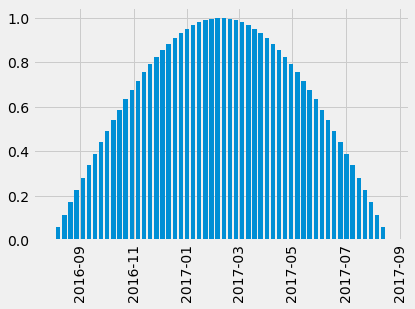

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
    
# Calculate the date 1 year ago from the last data point in the database
# date = dt.datetime(2020,12,31)
date = dt.datetime(2017,8,24)
results = session.query(Measurement.date).\
          filter(Measurement.date <= date).\
          order_by(Measurement.date.desc()).all()
#           order_by(Measurement.date.asc()).all()


precip = list(np.ravel(results))
# precip

# Perform a query to retrieve the data and precipitation scores
data_precip_data = session.query(Measurement.date).\
                   filter(Measurement.date <= date).\
                   filter(Measurement.prcp).\
                   group_by(Measurement.prcp).\
                   order_by(Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data = engine.execute("SELECT date, prcp FROM measurement")
conn = engine.connect()

# Sort the dataframe by date
data_by_date = pd.read_sql("SELECT date, prcp FROM measurement WHERE date BETWEEN '2016-07-31' AND '2017-08-23' ORDER BY date ASC", conn)

# Set the index to the date column
data_by_date.set_index('date', inplace=True)
data_by_date.dropna()

# Use Pandas Plotting with Matplotlib to plot the data

# # This code is overlapping the x axis, so I looked up for a solution on the stack overflow...
# plot_data = pd.DataFrame(data_by_date, columns=['prcp'])
# plot_data.plot.bar()

# plt.figure(figsize=(12,8))
# plt.xticks(data_by_date['prcp'].values[::12], rotation=90)
# plt.xticks(rotation=45)
# fig.autofmt_xdate()
# plt.show()

# # And, I find the solution on the stack overflow, and used the code below to fix the issue...
import matplotlib.dates as mdates

# Generate a series of dates (these are in matplotlib's internal date format)
dates = mdates.drange(dt.datetime(2016, 7, 31), dt.datetime(2017,8,23), 
                      dt.timedelta(weeks=1))

# Create some data for the y-axis
counts = np.sin(np.linspace(0, np.pi, dates.size))

# Set up the axes and figure
fig, ax = plt.subplots()

# By default, the bars will have a width of 0.8 (days, in this case) We want
# them quite a bit wider, so we'll make them them the minimum spacing between
# the dates. (To use the exact code below, you'll need to convert your sequence
# of datetimes into matplotlib's float-based date format.  
# Use "dates = mdates.date2num(dates)" to convert them.)
width = np.diff(dates).min()

# Make a bar plot. Note that I'm using "dates" directly instead of plotting
# "counts" against x-values of [0,1,2...]
ax.bar(dates, counts, align='center', width=5)

# Tell matplotlib to interpret the x-axis values as dates
ax.xaxis_date()

# Make space for and rotate the x-axis tick labels
# fig.autofmt_xdate()
plt.xticks(rotation=90)

plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data

# mean = data_by_date["prcp"].mean()
# print(f'Mean of the precipitation data is {mean}.')

# median = data_by_date["prcp"].median()
# print(f'Median of the precipitation data is {median}.')

# maximum = data_by_date["prcp"].max()
# print(f'Maximum number of precipitation data is {maximum}.')

# minimum = data_by_date["prcp"].min()
# print(f'Minimum number of precipitation data is {minimum}.')

describe = data_by_date["prcp"].describe()
print(f'Summary statistics of the precipitation data: {describe}.')

Summary statistics of the precipitation data: count    2153.000000
mean        0.184292
std         0.470654
min         0.000000
25%         0.000000
50%         0.020000
75%         0.140000
max         6.700000
Name: prcp, dtype: float64.


In [22]:
# Design a query to show how many stations are available in this dataset?
stations = engine.execute("SELECT * FROM station")
available_stations = session.query(stations)
print(session.name)

# station = engine.execute("SELECT * FROM station")

# stations = session.query(station)
# print(session.station)

# for station in stations:
#     print(f"Stations Available: {station.station} | Names Of The Available Stations: {station.name}.")
    
# station_count = engine.execute("SELECT count(station) FROM station")
# for count in station_count:
#     print(f"Number Of Stations: {count}.")

InvalidRequestError: SQL expression, column, or mapped entity expected - got '<sqlalchemy.engine.result.ResultProxy object at 0x000001FF08717D48>'

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
